# Discovering Dynamic Patterns from Coronavirus Data using Dynamic Mode Decomposition with Control: World Data

## Import Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from pydmd import DMD,DMDc,DMDBase
from datetime import timedelta, date, datetime
import re 
from urllib.request import urlopen
import json
import plotly.express as px
from control.matlab import *
# Note: Python control toolbox can be found at at https://python-control.readthedocs.io/
import slycot
import scipy 

# for dark theme
plt.rcParams['text.color'] = 'white'
plt.rcParams.update({'text.color' : "white",
                     'axes.labelcolor' : "white",
                    'xtick.color' : "white",
                    'ytick.color' : "white"})

In [2]:
# for light theme
plt.rcParams['text.color'] = 'black'
plt.rcParams.update({'text.color' : "black",
                     'axes.labelcolor' : "black",
                    'xtick.color' : "black",
                    'ytick.color' : "black"})

In [3]:
# import time_series_covid19_confirmed_global.csv
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url, error_bad_lines=False)

In [4]:
# import time_series_covid19_deaths_global.csv
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
deaths = pd.read_csv(url, error_bad_lines=False)

In [5]:
confirmed

Province/State         Country/Region        Lat       Long  1/22/20  \
0              NaN            Afghanistan  33.000000  65.000000        0   
1              NaN                Albania  41.153300  20.168300        0   
2              NaN                Algeria  28.033900   1.659600        0   
3              NaN                Andorra  42.506300   1.521800        0   
4              NaN                 Angola -11.202700  17.873900        0   
..             ...                    ...        ...        ...      ...   
261            NaN  Sao Tome and Principe   0.186360   6.613081        0   
262            NaN                  Yemen  15.552727  48.516388        0   
263            NaN                Comoros -11.645500  43.333300        0   
264            NaN             Tajikistan  38.861034  71.276093        0   
265            NaN                Lesotho -29.609988  28.233608        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  6/1/20  6/2/20  6/3/20  \
0          0        0        0        0        0  ...   15750   16509   17267   
1          0        0        0        0        0  ...    1143    1164    1184   
2          0        0        0        0        0  ...    9513    9626    9733   
3          0        0        0        0        0  ...     765     844     851   
4          0        0        0        0        0  ...      86      86      86   
..       ...      ...      ...      ...      ...  ...     ...     ...     ...   
261        0        0        0        0        0  ...     484     484     484   
262        0        0        0        0        0  ...     354     399     419   
263        0        0        0        0        0  ...     106     132     132   
264        0        0        0        0        0  ...    4013    4100    4191   
265        0        0        0        0        0  ...       2       2       4   

     6/4/20  6/5/20  6/6/20  6/7/20  6/8/20  6/9/20  6/10/20  
0     18054   18969   19551   20342   20917   21459    22142  
1      1197    1212    1232    1246    1263    1299     1341  
2      9831    9935   10050   10154   10265   10382    10484  
3       852     852     852     852     852     852      852  
4        86      86      88      91      92      96      113  
..      ...     ...     ...     ...     ...     ...      ...  
261     485     499     499     513     513     514      611  
262     453     469     482     484     496     524      560  
263     132     132     141     141     141     141      162  
264    4289    4370    4453    4529    4609    4690     4763  
265       4       4       4       4       4       4        4  

[266 rows x 145 columns]

In [6]:
deaths

Province/State         Country/Region        Lat       Long  1/22/20  \
0              NaN            Afghanistan  33.000000  65.000000        0   
1              NaN                Albania  41.153300  20.168300        0   
2              NaN                Algeria  28.033900   1.659600        0   
3              NaN                Andorra  42.506300   1.521800        0   
4              NaN                 Angola -11.202700  17.873900        0   
..             ...                    ...        ...        ...      ...   
261            NaN  Sao Tome and Principe   0.186360   6.613081        0   
262            NaN                  Yemen  15.552727  48.516388        0   
263            NaN                Comoros -11.645500  43.333300        0   
264            NaN             Tajikistan  38.861034  71.276093        0   
265            NaN                Lesotho -29.609988  28.233608        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  6/1/20  6/2/20  6/3/20  \
0          0        0        0        0        0  ...     265     270     294   
1          0        0        0        0        0  ...      33      33      33   
2          0        0        0        0        0  ...     661     667     673   
3          0        0        0        0        0  ...      51      51      51   
4          0        0        0        0        0  ...       4       4       4   
..       ...      ...      ...      ...      ...  ...     ...     ...     ...   
261        0        0        0        0        0  ...      12      12      12   
262        0        0        0        0        0  ...      84      87      95   
263        0        0        0        0        0  ...       2       2       2   
264        0        0        0        0        0  ...      47      47      48   
265        0        0        0        0        0  ...       0       0       0   

     6/4/20  6/5/20  6/6/20  6/7/20  6/8/20  6/9/20  6/10/20  
0       300     309     327     357     369     384      405  
1        33      33      34      34      34      34       34  
2       681     690     698     707     715     724      732  
3        51      51      51      51      51      51       51  
4         4       4       4       4       4       4        4  
..      ...     ...     ...     ...     ...     ...      ...  
261      12      12      12      12      12      12       12  
262     103     111     111     112     112     127      129  
263       2       2       2       2       2       2        2  
264      48      48      48      48      48      48       48  
265       0       0       0       0       0       0        0  

[266 rows x 145 columns]

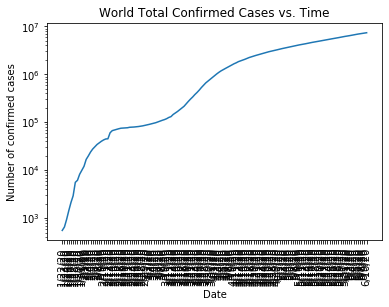

In [7]:
# plot confirmed cases vs. time
plt.title('World Total Confirmed Cases vs. Time')

plt.plot(confirmed.loc[:,'1/22/20':].sum())

plt.xlabel('Date')
plt.ylabel('Number of confirmed cases')
plt.yscale('log')
plt.xticks(rotation='vertical')

plt.show()

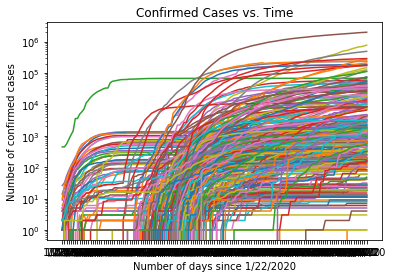

In [8]:
# plot confirmed cases vs. time
plt.title('Confirmed Cases vs. Time')

plt.plot(confirmed.loc[:,'1/22/20':].T)

plt.xlabel('Number of days since 1/22/2020')
plt.ylabel('Number of confirmed cases')
plt.yscale('log')

plt.show()

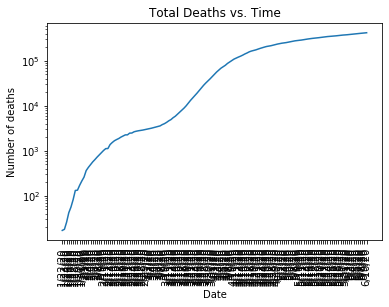

In [9]:
# plot confirmed cases vs. time
plt.title('Total Deaths vs. Time')

plt.plot(deaths.loc[:,'1/22/20':].sum())

plt.xlabel('Date')
plt.ylabel('Number of deaths')
plt.yscale('log')
plt.xticks(rotation='vertical')

plt.show()

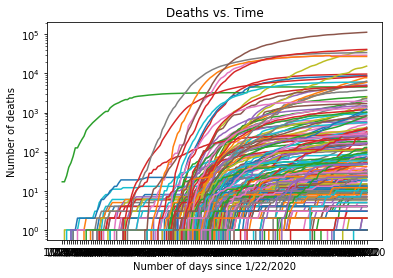

In [10]:
# plot confirmed cases vs. time
plt.title('Deaths vs. Time')

plt.plot(deaths.loc[ :,'1/22/20':].T)

plt.xlabel('Number of days since 1/22/2020')
plt.ylabel('Number of deaths')
plt.yscale('log')

plt.show()

## Convert Data into an Array

subtract mean from time series and set variance to one

In [11]:
# Select data with few initial conditions of 0
scaledData = confirmed.loc[:,'3/10/20':] # starting March 10th

In [12]:
# Convert data to array
scaledData = scaledData.to_numpy()
scaledData

array([[    5,     7,     7, ..., 20917, 21459, 22142],
       [   10,    12,    23, ...,  1263,  1299,  1341],
       [   20,    20,    24, ..., 10265, 10382, 10484],
       ...,
       [    0,     0,     0, ...,   141,   141,   162],
       [    0,     0,     0, ...,  4609,  4690,  4763],
       [    0,     0,     0, ...,     4,     4,     4]], dtype=int64)

## Take DMD

In [30]:
dmd = DMD(svd_rank=6)
dmd.fit(scaledData)


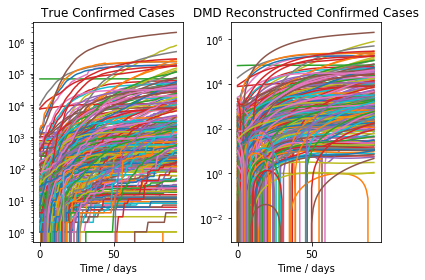

In [31]:
# plot true data
plt.subplot(1, 2, 1)
plt.title('True Confirmed Cases')
plt.plot(scaledData.T)
plt.xlabel('Time / days')
plt.yscale('log')

# plot dmd reconstructed data
plt.subplot(1, 2, 2)
plt.title('DMD Reconstructed Confirmed Cases')
plt.plot(dmd.reconstructed_data.real.T)
plt.xlabel('Time / days')
plt.yscale('log')
plt.tight_layout()
plt.show()

Eigenvalue (1.0122577240030164+0j): distance from unit circle 0.024665699803766872
Eigenvalue (1.0156336683559162+0.02469133235291567j): distance from unit circle 0.03212141019145731
Eigenvalue (1.0156336683559162-0.02469133235291567j): distance from unit circle 0.03212141019145731
Eigenvalue (0.9894804957630203+0.07707724491717095j): distance from unit circle 0.01498744682054598
Eigenvalue (0.9894804957630203-0.07707724491717095j): distance from unit circle 0.01498744682054598
Eigenvalue (0.8748983668448617+0j): distance from unit circle 0.23455284769219387


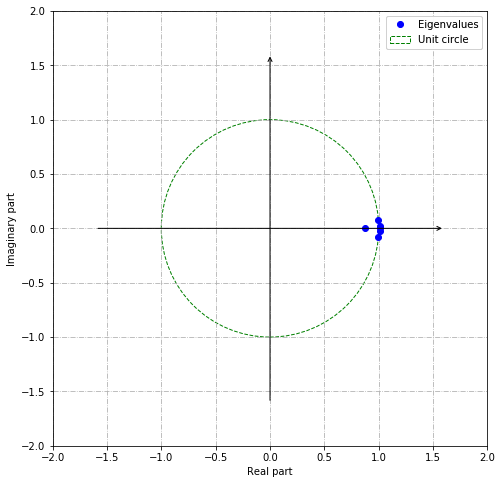

In [32]:
for eig in dmd.eigs:
    print('Eigenvalue {}: distance from unit circle {}'.format(eig, np.abs(eig.imag**2+eig.real**2 - 1)))

dmd.plot_eigs(show_axes=True, show_unit_circle=True)

Eigenvalue 0.012183206430056817, 0.0
Eigenvalue 0.01580815283701782, 0.02430647028267819
Eigenvalue 0.01580815283701782, -0.02430647028267819
Eigenvalue -0.007550446773316621, 0.07773969428230736
Eigenvalue -0.007550446773316621, -0.07773969428230736
Eigenvalue -0.13364755154801009, 0.0


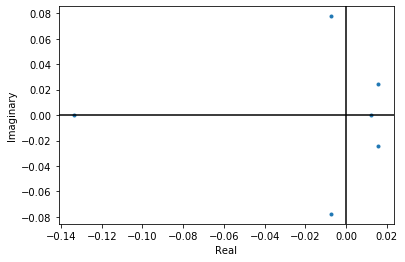

In [33]:
# Continuous Eigenvalues

plt.plot(np.log(dmd.eigs).real,np.log(dmd.eigs).imag,'.')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel('Real')
plt.ylabel('Imaginary')

for eig in dmd.eigs:
    print('Eigenvalue {}, {}'.format(np.log(eig).real, np.log(eig).imag))

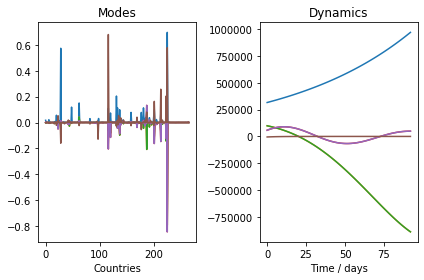

In [34]:
# modes
plt.subplot(1, 2, 1)
for mode in dmd.modes.T:
    plt.plot(mode.real)
    plt.title('Modes')
    plt.xlabel('Countries')


# dynamics
plt.subplot(1, 2, 2)
for dynamic in dmd.dynamics:
    plt.plot(dynamic.real)
    plt.title('Dynamics')
    plt.xlabel('Time / days')
plt.tight_layout()

plt.show()


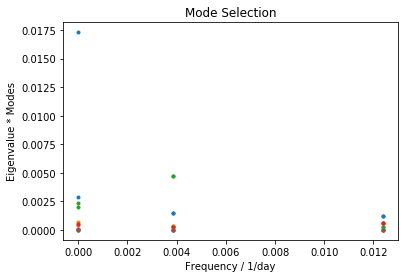

In [35]:
# Mode Selection

# Continuous Time Oscillatory Frequency for 24 hour period (units 1/h)
freq = (np.log(dmd.eigs)).imag/(2*np.pi)

i = 0
for eig in dmd.eigs:
    plt.plot(abs(freq),(abs(dmd.modes.real*eig))[i,:],'.')
    i+=1
plt.title('Mode Selection')
plt.xlabel('Frequency / 1/day')
plt.ylabel('Eigenvalue * Modes')
plt.show()


In [19]:
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)
df = confirmed
fig = px.choropleth(df,    locations='Country/Region',  
                           color=abs(mode.real),
                           range_color=(0, 1),
                           scope="world",
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Predict
1. Reduce data from last time step using dynamic modes:
$$
\mathbf{x}_k^{\sim} = U^{+}\mathbf{x}_k
$$

2. Use previous reduced data time step to get the next reduced data array:
$$
\mathbf{x}_{k+1}^{\sim} = \mathbf{A}\mathbf{x}_k^{\sim} 
$$

3. Multiply the reduced data by the modes to obtain the predicted data array:
$$
\mathbf{x}_{k} = \mathbf{U}\mathbf{x}_k^{\sim} 
$$

In [45]:
# Take DMD of data
dmd = DMD(svd_rank=3) # truncated SVD
dmd.fit(scaledData)

At = dmd.atilde #Koopman operator

In [46]:
# compute reduced data prediction and actual data prediction

# Intialize
days = 100 # number of days in the future to predict
x = np.zeros((len(scaledData[:,-1]),days)) # actual prediction
xt = np.zeros((len(At),days)) # reduced prediction
x[:,0] = scaledData[:,-1]
xt[:,0] = np.matmul(np.linalg.pinv(dmd.modes),scaledData[:,-1])

# Iterate to produce actual and reduced predictions
for i in range(1,days):
    xt[:,i] = np.matmul(At,xt[:,i-1])
    x[:,i] = np.matmul(dmd.modes,xt[:,i])

C:\Users\julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\Users\julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: ComplexWarning:

Casting complex values to real discards the imaginary part



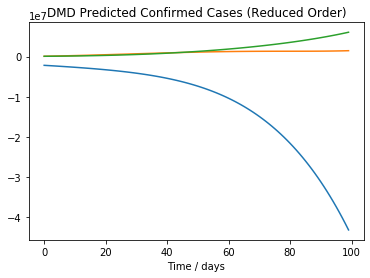

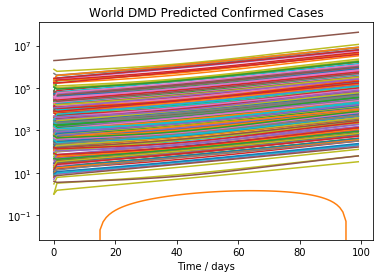

In [47]:
# Plot predicted cases
plt.plot(xt.T)
plt.title('DMD Predicted Confirmed Cases (Reduced Order)')
plt.xlabel('Time / days')
plt.show()

plt.plot(x.T)
plt.title('World DMD Predicted Confirmed Cases')
plt.xlabel('Time / days')
plt.yscale('log')
plt.show()

#### Testing prediction accuracy:

C:\Users\julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\Users\julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: ComplexWarning:

Casting complex values to real discards the imaginary part



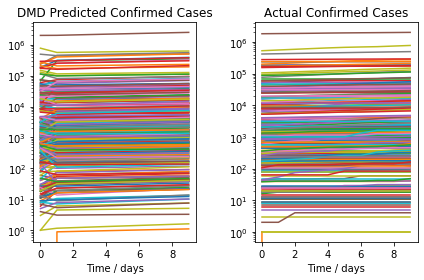

In [48]:
# Take DMD of data
days = 10 # number of days in the future to predict
testDays = np.size(scaledData,1)-days

dmd = DMD(svd_rank=3) # truncated SVD
dmd.fit(scaledData[:,:testDays]) # fit for selected days

At = dmd.atilde #Koopman operator

# compute reduced data prediction and actual data prediction

# Intialize
x = np.zeros((len(scaledData[:,testDays*-1]),days)) # actual prediction
xt = np.zeros((len(At),days)) # reduced prediction
x[:,0] = scaledData[:,-1]
xt[:,0] = np.matmul(np.linalg.pinv(dmd.modes),scaledData[:,-1])

# Iterate to produce actual and reduced predictions
for i in range(1,days):
    xt[:,i] = np.matmul(At,xt[:,i-1])
    x[:,i] = np.matmul(dmd.modes,xt[:,i])
    
plt.subplot(1, 2, 1)
plt.plot(x.T)
plt.title('DMD Predicted Confirmed Cases')
plt.xlabel('Time / days')
plt.yscale('log')

plt.subplot(1, 2, 2)
plt.plot(scaledData[:,testDays:].T)
plt.title('Actual Confirmed Cases')
plt.xlabel('Time / days')
plt.yscale('log')
plt.tight_layout()

plt.show()


In [49]:
['Predicted Day {}: Mean Error {} %, Standard Deviation of Error +/-{} %'.format(i+1,np.mean(np.abs(x[:,i]-scaledData[:,i+testDays]))/np.mean(scaledData[:,i+testDays])*100,np.std(np.abs(x[:,i]-scaledData[:,i+testDays]))/np.std(scaledData[:,i+testDays])*100) for i in range(days)]

['Predicted Day 1: Mean Error 17.392305005430806 %, Standard Deviation of Error +/-16.83139673641301 %',
 'Predicted Day 2: Mean Error 23.147705196189285 %, Standard Deviation of Error +/-21.372663050491433 %',
 'Predicted Day 3: Mean Error 24.548009946536673 %, Standard Deviation of Error +/-22.705066164318904 %',
 'Predicted Day 4: Mean Error 26.529133924799662 %, Standard Deviation of Error +/-24.12818690317638 %',
 'Predicted Day 5: Mean Error 28.385571656223128 %, Standard Deviation of Error +/-25.29503236968507 %',
 'Predicted Day 6: Mean Error 30.30138219710753 %, Standard Deviation of Error +/-26.758292315576167 %',
 'Predicted Day 7: Mean Error 32.25847459970746 %, Standard Deviation of Error +/-28.44352244894376 %',
 'Predicted Day 8: Mean Error 34.16142778751446 %, Standard Deviation of Error +/-30.191897994638094 %',
 'Predicted Day 9: Mean Error 36.189753291891726 %, Standard Deviation of Error +/-31.98644290470757 %',
 'Predicted Day 10: Mean Error 38.09856521160458 %, St

Predictions are only valid for about 15 days.  The highest accuracy predictions occur at an svd rank of 3.

### DMDc: DMD with Control

Since we want to add the control, the evolution of the complex system can be formally summarized as:$$
\mathbf{x}_{k+1} = \mathbf{A}\mathbf{x}_k + \mathbf{B}\mathbf{u}_k,
$$where the operators $\mathbf{A}$ and $\mathbf{B}$ are the ones we will approximate using DMD.

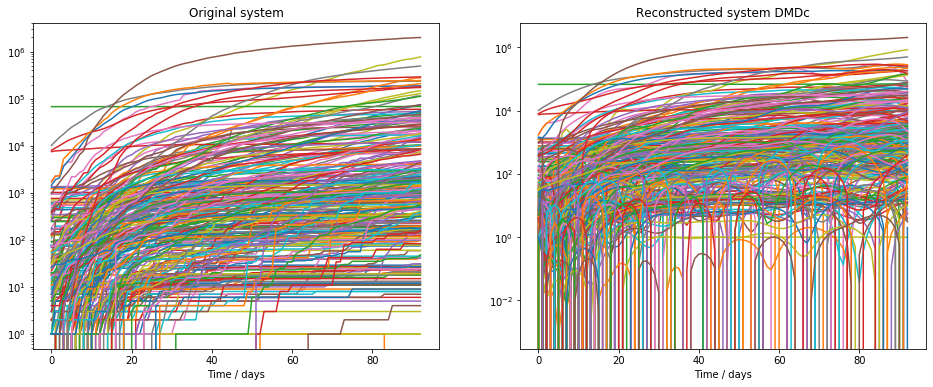

In [50]:
dmdc = DMDc()
dmdc.fit(scaledData, np.zeros(np.size(scaledData,1)-1)) # fit dmdc with no control

# plot reconstructed system

plt.figure(figsize=(16,6))

plt.subplot(121)
plt.title('Original system')
plt.xlabel('Time / days')
plt.yscale('log')
plt.plot(scaledData.T)

plt.subplot(122)
plt.title('Reconstructed system DMDc')
plt.xlabel('Time / days')
plt.yscale('log')
plt.plot(dmdc.reconstructed_data().real.T)



plt.show()

#### Determine Optimal Input for Control

In [53]:
# State space system
dmd = DMD(svd_rank=3)
dmd.fit(scaledData)

# Define linear systems (in state-space form)
A = dmd.atilde # # of days x # of days
Ac = scipy.linalg.logm(A) # find equivalent continuous-time A matrix
B = np.zeros((len(A),1))
B[:,0] = 1
C = np.ones((1,len(A)))

# system parameters
x0 = np.matmul(np.linalg.pinv(dmd.modes),scaledData[:,0]) # initial condition 
t = np.arange(0,365,1);

sys1 = StateSpace(Ac,B,C,0)
sys1tf = ss2tf(sys1)
sys1tf


        3 s^2 - 0.2468 s + 0.001339
------------------------------------------
s^3 - 0.06389 s^2 + 0.002859 s - 6.011e-05

C:\Users\julia\Anaconda3\lib\site-packages\control\timeresp.py:318: ComplexWarning:

Casting complex values to real discards the imaginary part



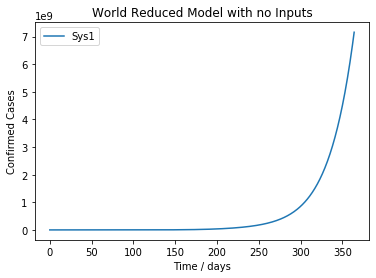

In [54]:
# With no input, these will be the same

yout1,t1,xout1 = lsim(sys1,U = 0.0, T = t, X0 = x0)
fig, ax = plt.subplots()
ax.plot(t,yout1,label='Sys1')
leg = ax.legend();

plt.title('World Reduced Model with no Inputs')
plt.xlabel('Time / days')
plt.ylabel('Confirmed Cases');

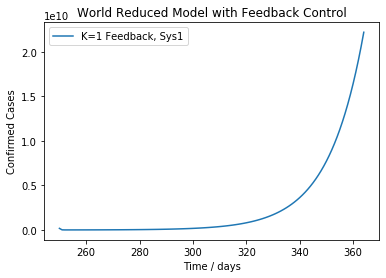

In [56]:
# Try proportional control
sysfb1 = feedback(sys1,1)
fbind = 250 # time index when feedback starts

# Run closed-loop systems
youtfb1,tfb1,xoutfb1 = lsim(sysfb1, T = t[fbind:], X0 = xout1[fbind])

# Plot results
fig, ax = plt.subplots()
ax.plot(tfb1,youtfb1,label='K=1 Feedback, Sys1')


plt.title('World Reduced Model with Feedback Control')
plt.xlabel('Time / days')
plt.ylabel('Confirmed Cases');
leg = ax.legend();

C:\Users\julia\Anaconda3\lib\site-packages\control\timeresp.py:318: ComplexWarning:

Casting complex values to real discards the imaginary part



K values: [[-0.20740265 -0.11030442  0.64014504]]
S values: [[ 80.0832921   -8.26208738 -92.5614698 ]
 [ -8.26208738  68.41660782 -71.18496237]
 [-92.5614698  -71.18496237 227.76093609]]
P values: [-0.0200397 +0.j         -0.11925212+0.01548968j -0.11925212-0.01548968j]


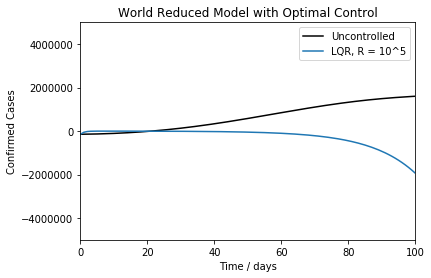

In [60]:
# LQR control

Q = np.identity(len(A));
R = 100;
Klqr1,Slqr1,Plqr1 = lqr(Ac,B,Q,R) 

sysLQR1 = StateSpace(Ac- Klqr1*B,B,C,0)

youtfb1,tfb1,xoutfb1 = lsim(sysLQR1, T = t, X0 = x0)

fig, ax = plt.subplots()
ax.plot(t,yout1,'k',label='Uncontrolled')
ax.plot(tfb1,youtfb1,label='LQR, R = 10^5')
leg = ax.legend()
plt.title('World Reduced Model with Optimal Control')
plt.xlabel('Time / days')
plt.ylabel('Confirmed Cases');
plt.ylim(-5000000,5000000)
plt.xlim(0,100)


print('K values:', Klqr1)
print('S values:', Slqr1)
print('P values:', Plqr1)